In [1]:
import pandas as pd


In [4]:

df=pd.read_csv('/content/merged_file.csv')

kasavanahalli_properties = df[df['locality'] == 'Kasavanahalli']
hsr_properties = df[df['locality'] == 'HBR Layout']
bellandur_properties = df[df['locality'] == 'Bellandur']
btm_properties = df[df['locality'] == 'BTM Layout']

kasavanahalli_rents = kasavanahalli_properties['rent']
h_rents = hsr_properties['rent']
b_rents = bellandur_properties['rent']
btm_rents = btm_properties['rent']


print(kasavanahalli_rents)


average_rent_1= kasavanahalli_rents.mean()
average_rent_2= h_rents.mean()
average_rent_3= b_rents.mean()
average_rent_4= btm_rents.mean()

print(f"Average Rent in Kasavanahalli: {average_rent_1}")
print(f"Average Rent in HSR Layout: {average_rent_2}")
print(f"Average Rent in Bellandur: {average_rent_3}")
print(f"Average Rent in BTM Layout: {average_rent_4}")


7798    30000.0
7799    22500.0
7800    70000.0
7801    15000.0
7802    20000.0
         ...   
7929    25000.0
7930    35000.0
7931     8000.0
7932    25000.0
7933    17000.0
Name: rent, Length: 136, dtype: float64
Average Rent in Kasavanahalli: 20709.926470588234
Average Rent in HSR Layout: 16508.479532163743
Average Rent in Bellandur: 25949.46325878594
Average Rent in BTM Layout: 14352.239024390245


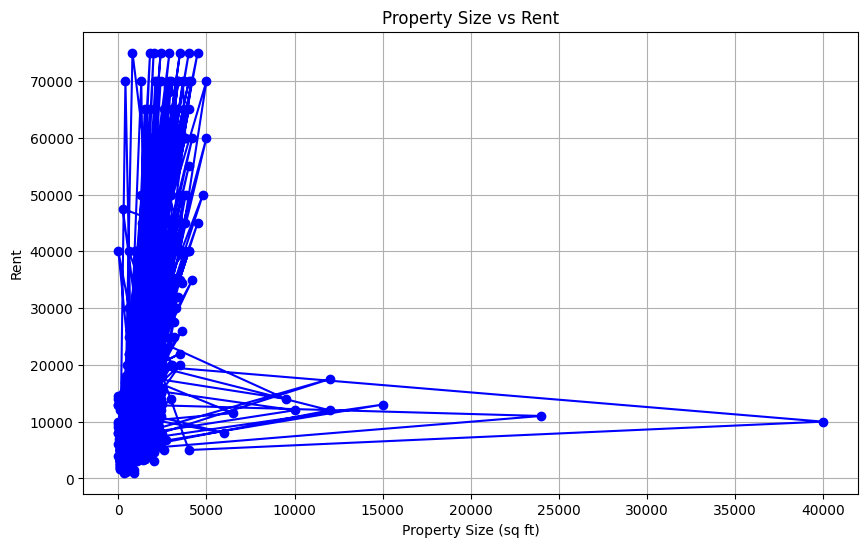

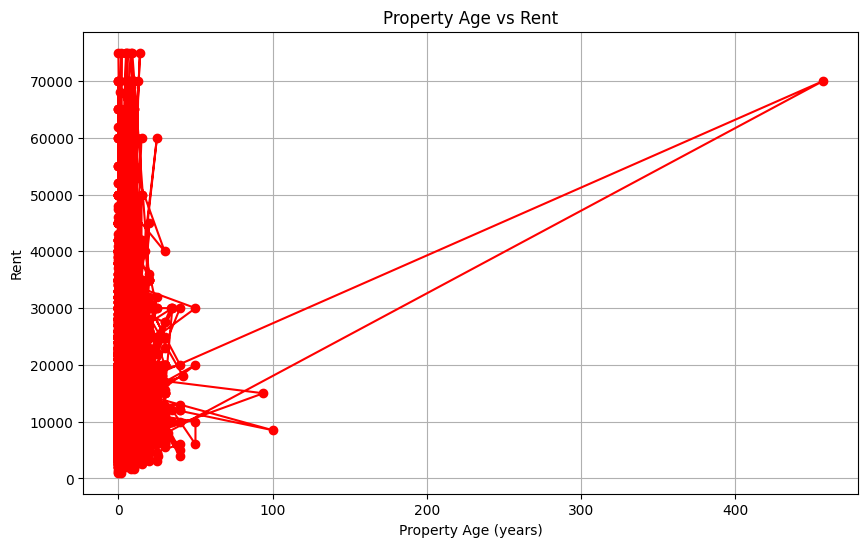

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df['property_size'], df['rent'], marker='o', linestyle='-', color='b')
plt.title('Property Size vs Rent')
plt.xlabel('Property Size (sq ft)')  # Change to appropriate unit if needed
plt.ylabel('Rent')
plt.grid(True)
plt.show()

# Plotting Property Age vs Rent
plt.figure(figsize=(10, 6))
plt.plot(df['property_age'], df['rent'], marker='o', linestyle='-', color='r')
plt.title('Property Age vs Rent')
plt.xlabel('Property Age (years)')
plt.ylabel('Rent')
plt.grid(True)
plt.show()


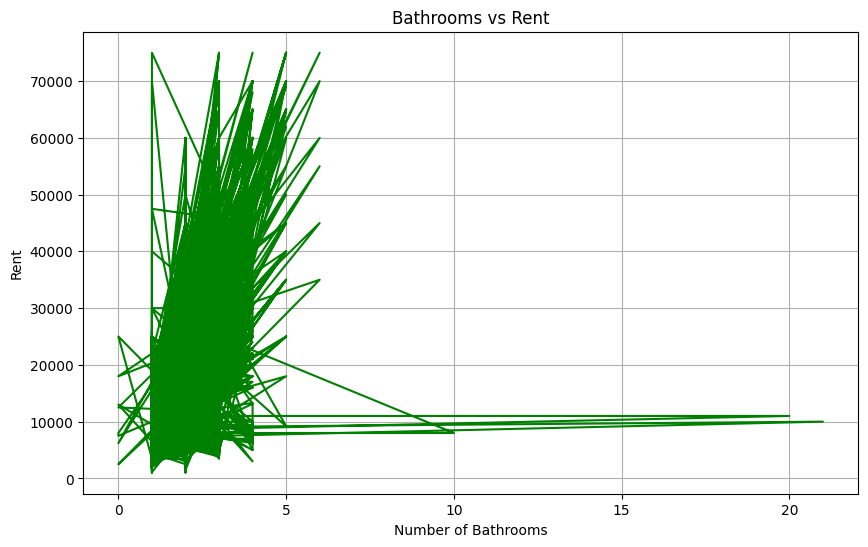

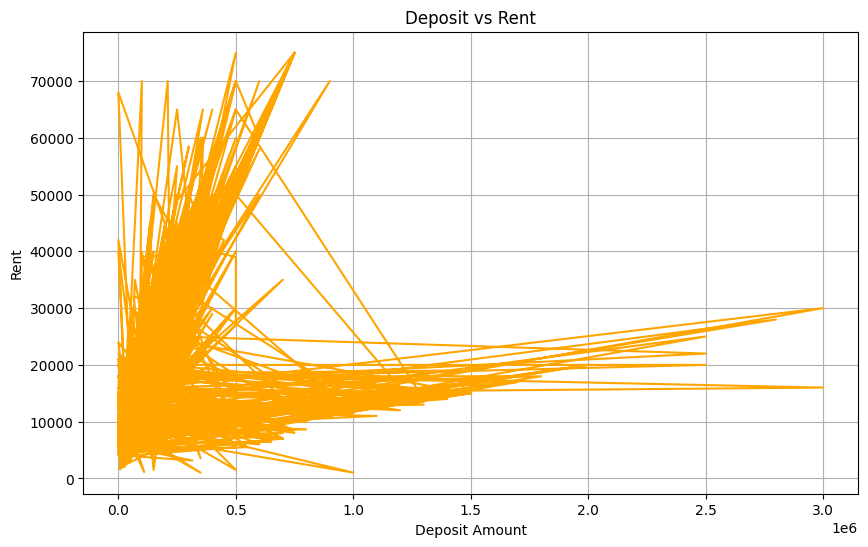

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df['bathroom'], df['rent'], color='green')
plt.title('Bathrooms vs Rent')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df['deposit'], df['rent'], color='orange')
plt.title('Deposit vs Rent')
plt.xlabel('Deposit Amount')
plt.ylabel('Rent')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd


def categorize_property_age(age):
    if age <= 1:
        return 'New'
    elif 1 < age <= 5:
        return 'Less than 5 years'
    elif 5 < age <= 10:
        return '5 to 10 years'
    elif 10 < age <= 20:
        return '10 to 20 years'
    else:
        return 'More than 20 years'

df['property_age_category'] = df['property_age'].apply(categorize_property_age)


print(df[['property_age', 'property_age_category']].head())


   property_age property_age_category
0           2.0     Less than 5 years
1           5.0     Less than 5 years
2           2.0     Less than 5 years
3           1.0                   New
4           1.0                   New


In [9]:

category_counts = df['property_age_category'].value_counts()

print(category_counts)


property_age_category
New                   4998
Less than 5 years     4453
5 to 10 years         3137
More than 20 years    1209
10 to 20 years         735
Name: count, dtype: int64


In [10]:

type_counts = df['type'].value_counts()


print(type_counts)


type
BHK2        6728
BHK3        2792
BHK1        2788
RK1          888
BHK4         210
BHK4PLUS      29
Name: count, dtype: int64


In [12]:

df['gym'] = df['gym'].replace({'False': 0, 'Flase': 0, 'True': 1})
df['lift'] = df['lift'].replace({'False': 0, 'Flase': 0, 'True': 1})
df['swimming_pool'] = df['swimming_pool'].replace({'False': 0, 'Flase': 0, 'True': 1})


avg_rent_gym = df[df['gym'] == 1]['rent'].mean()
avg_rent_lift = df[df['lift'] == 1]['rent'].mean()
avg_rent_pool = df[df['swimming_pool'] == 1]['rent'].mean()

amenity_avg_rent = {
    'Gym': avg_rent_gym,
    'Lift': avg_rent_lift,
    'Swimming Pool': avg_rent_pool
}
print(avg_rent_gym)
print(avg_rent_lift)
print(avg_rent_pool)

max_amenity = max(amenity_avg_rent, key=amenity_avg_rent.get)
max_avg_rent = amenity_avg_rent[max_amenity]

print(f"The amenity with the greatest impact on rent is {max_amenity} with an average rent of {max_avg_rent:.2f}")


28114.70588235294
24603.43137254902
33708.333333333336
The amenity with the greatest impact on rent is Swimming Pool with an average rent of 33708.33


In [14]:

df['activation_date'] = pd.to_datetime(df['activation_date'])
activation_counts = df.groupby('property_id')['activation_date'].count()


avg_rent_by_locality = df.groupby('locality')['rent'].mean()


top_localities = ['Bellandur', 'Kasavanahalli', 'HBR Layout', 'Brookefield']
top_localities_avg_rent = avg_rent_by_locality[top_localities]


top_locality_data = df[df['locality'].isin(top_localities)]

top_locality_data = top_locality_data.merge(activation_counts, left_on='property_id', right_index=True, how='left')


highest_interaction_property = top_locality_data.loc[top_locality_data['activation_date_y'].idxmax()]


print(f"The locality with the highest average rent is {highest_interaction_property['locality']}.")
print(f"The property with the highest interaction count has {highest_interaction_property['activation_date_y']} interactions.")


The locality with the highest average rent is Bellandur.
The property with the highest interaction count has 1 interactions.


In [15]:

df['activation_date'] = pd.to_datetime(df['activation_date'])


top_localities = ['Bellandur', 'Kasavanahalli', 'HBR Layout', 'Brookefield']
top_locality_data = df[df['locality'].isin(top_localities)]

activation_counts_by_locality = top_locality_data.groupby('locality')['activation_date'].count()


highest_interaction_locality = activation_counts_by_locality.idxmax()
highest_interaction_count = activation_counts_by_locality.max()


print(f"The locality with the highest interaction count is {highest_interaction_locality} with {highest_interaction_count} activations.")


The locality with the highest interaction count is Bellandur with 313 activations.


In [ ]:
import pandas as pd


df = pd.read_csv('/content/merged_file.csv')


df_requests = pd.read_csv('/content/property_interactions.csv')


merged_data = pd.merge(df, df_requests, on='property_id', how='left')


merged_data.to_csv('merged_file.csv', index=False)


In [17]:
import pandas as pd


hsr_layout_df = pd.read_csv('/content/HSR_Layout.csv', encoding='utf-32')

merged_csv_df = pd.read_csv('/content/merged_file.csv')


print(hsr_layout_df.head())
print(merged_csv_df.head())


  property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type
0  ff808081486e6af00148744180fd02b1/BHK2/19-02-20...                                                                                                                                                         
1  ff80808149393cef014955efe1500fd1/BHK2/25-03-20...                                                                                                                                                         
2  ff8080814ada14f3014b0bd49e7731ee/BHK2/07-02-20...                                                                                                                                                         
3  ff8081814bd62607014bde7f7bfa0d80/RK1/01-02-201...                                                                                                                            

In [20]:
import pandas as pd




lease_anyone = df[df['lease_type'] == 'ANYONE']


total_properties = len(df)
properties_anyone = len(lease_anyone)


percentage_anyone = (properties_anyone / total_properties) * 100

print(f"Percentage of properties available for lease under the 'Anyone' category: {percentage_anyone:.2f}%")


Percentage of properties available for lease under the 'Anyone' category: 40.94%


In [25]:
import pandas as pd
from scipy import stats

df=pd.read_csv('/content/merged_file_2.csv')

with_gym = df[df['gym'] == 'Yes']['request_date']
without_gym = df[df['gym'] == 'No']['request_date']

t_stat, p_value = stats.ttest_ind(with_gym, without_gym, equal_var=False)

alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"


print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(result)


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis


<ipython-input-25-5c130d75d7e5>:5: DtypeWarning: Columns (7,11,16,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/merged_file_2.csv')
